# Deep Learning - Exercise 1
In this lecture, we'll explore essential TensorFlow 2 and Keras concepts through hands-on examples with the MNIST dataset - the "Hello World" of deep learning. We'll cover:

**Core Concepts**
- 🚀 Building and training a basic neural network for digit classification
- 📒 Understanding validation strategies for model evaluation
- 📊 Exploring model complexity and its impact on performance
- ✅ Designing optimal architectures using fully connected layers

![meme01](https://github.com/rasvob/VSB-FEI-Deep-Learning-Exercises/blob/main/images/dl_meme_01.jpg?raw=true "AI Meme")

[Open in Google colab](https://colab.research.google.com/github/rasvob/VSB-FEI-Deep-Learning-Exercises/blob/main/dl_01.ipynb)

[Download from Github](https://github.com/rasvob/VSB-FEI-Deep-Learning-Exercises/blob/main/dl_01.ipynb)

##### Remember to set **GPU** runtime in Colab!

### Import of the TensorFlow
The main version of the TensorFlow (TF) is a in the Version package in the field VERSION
Since the TensformFlow 2.0 everything was encapsulaed under the KERAS api.

In [1]:
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score
import time

tf.version.VERSION

'2.18.0'

# Import a dataset
* Datasets are stored in the keras.datasets submodule. Few testing datasets are stored here and installed together with the TF package

In [2]:
# mnist is the basic dataset with handwritten digits
mnist = tf.keras.datasets.mnist

# data from any dataset are loaded using the load_Data function
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# the data are in the form of 28x28 pixes with values 0-255.
print('Train data shape: ', x_train.shape)
print('Test data shape:  ', x_test.shape)

Train data shape:  (60000, 28, 28)
Test data shape:   (10000, 28, 28)


* The dataset consists of 60,000 training images and 10,000 testing images. All of the are 28x28 pixels.

## Let's take look on the data
* 💡 Look closely on the value scale - it is from 0 to 255 as usual in grayscale images.

## We can see that the numbers are already centered - you won't see this feature in the real world images often 🙂
* Some of the images are quite easy to classify but on the other hand there is a lot of noise in the data as well.

**Example Analysis**
- Some digits exhibit characteristics of multiple classes
- **Sample 1**: Clear, well-defined digit with distinct features
- **Sample 2**: Ambiguous sample showing characteristics of both "1" and "7"
    - Missing the horizontal stroke typical of "7"
    - Slight angle resembling a slanted "1"

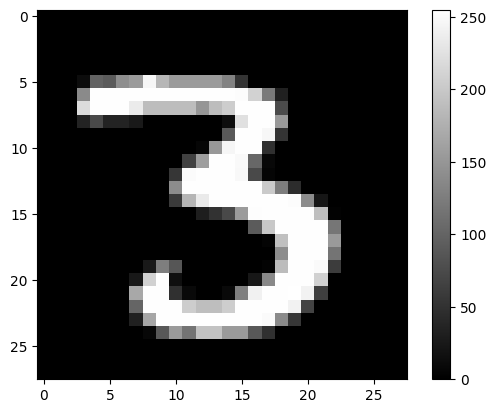

In [3]:
plt.figure()
plt.imshow(x_train[12], cmap='gray', vmin = 0, vmax = 255)
plt.colorbar()
plt.grid(False)
plt.show()

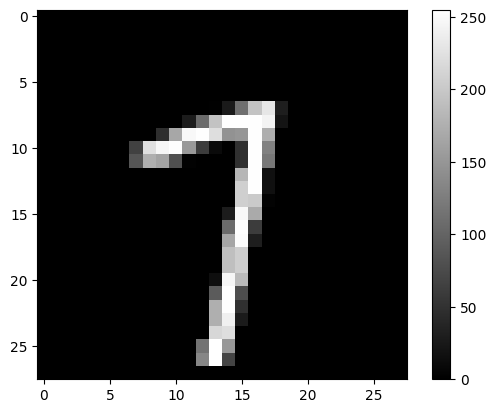

In [4]:
plt.figure()
plt.imshow(x_train[42], cmap='gray', vmin = 0, vmax = 255)
plt.colorbar()
plt.grid(False)
plt.show()

In [5]:
y_train[42]

7

## Normalizing Pixel Values

- Convert pixel values from 0-255 to \(0,1\) by dividing each value by 255.
- **🔎 Why Normalize?**
  - Smaller input values stabilize gradient updates.
  - Consistent input scale improves the adjustment of network weights.

- sigmoid - at the end we have one neuron, which takes values between 0 and 1, normalization helps this range of the function

- tanh - the same principle as sigmoid, but the range of values is extended from 0 to 1 to -1 to 1, this helps recurrent networks, which gradually convert to a given class, until the given value is reset to zero and helps calculations

- softmax - at the end, one neuron is created for each class, which determines the probability that it is the given class

Normalization helps these functions, improves performance at minimal cost since most of those activation function takes values around zero.

In [6]:
x_train, x_test = x_train / 255.0, x_test / 255.0

# Make better visualization of the data to better understand how complex they are
* You can see that "noisy" digit and different handwriting style is really no exception

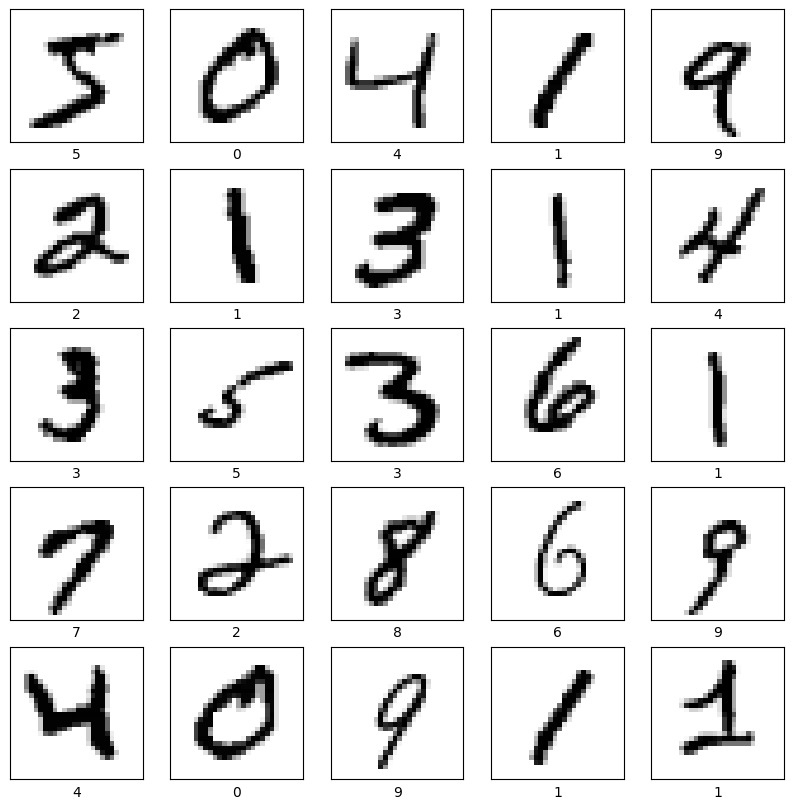

In [7]:
class_names = [str(x) for x in range(10)]

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

## 🌳 Before we dive in the deep learning territory, let's try to create some baseline model using a machine learning so we can compare the approaches
* 🔎 Are ML models capable of processing image data?
    * How to deal with a matrix input?

In [8]:
alg = DecisionTreeClassifier()
alg.fit(x_train.reshape(-1, 28*28), y_train)

DecisionTreeClassifier()

In [9]:
y_pred = alg.predict(x_test.reshape(-1, 28*28))

In [10]:
y_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [11]:
accuracy_score(y_true=y_test, y_pred=y_pred)

0.8784

# We can see that we were able to create a classifier very easily.
* 💡 However it is no secret, that DL models accuracy on MNIST can be >= 98% even with simple architecture
    * Given the fact, our result is not very impresive 🙂

# Basic model - ANN with very simple hierarchy
   * Model is created using layers, many layers exists in the [layer submodule](https://www.tensorflow.org/api_docs/python/tf/keras/layers)
   * Each layer uses a activation functions collected in the [module nn](https://www.tensorflow.org/api_docs/python/tf/nn)

### 💡 There are 2 ways of using the Keras API - **Sequential** and **Functional**
   * We will start with the sequential one

* 🔎 Why do we use activation functions?
* 🔎 How is ANN different from lin. regression?

# 🚀 Let's design our first ANN
   * Can you draw such network on a table?

In [12]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),# Flatten module flatten the multidimension input into single vector 28x28 = 784 float numbers
    keras.layers.Dense(32, activation=tf.nn.relu), # standard dense-fully connected layer with the rectified lineaar function as an activation
    keras.layers.Dense(10, activation=tf.nn.softmax), # another fully-connected layer with softmax activation function
])

model.summary() # prints the summary of the model

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │          25,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,450 (99.41 KB)

 Trainable params: 25,450 (99.41 KB)

 Non-trainable params: 0 (0.00 B)

Neural networks are used for more complex data—images, text, or sound. Decision trees handle vector data just fine.

### 🔎 What is the meaning of the *Total params* number?

# 📒 Model Compilation

Each model must be compiled to fit the data and predict labels.

## ⚙️ Optimizers

- A variety of optimizers are available, many based on gradient descent, with gradient-free options (e.g., [Nevergrad by META](https://github.com/facebookresearch/nevergrad)).

### 🔑 Selected Optimizers

- **📉 Gradient Descent**  
  Uses the full dataset; not ideal for large datasets.
  
- **🎲 Stochastic Gradient Descent (SGD)**  
  Estimates the gradient using a subset of data.
  
- **📊 RMSProp**  
  Adapts the learning rate using the running average of recent gradients.
  
- **⚡ ADAM**  
  Combines gradient average and second moment to adapt the learning rate.

## 🧮 Loss Functions

💡 *Training aims to optimize weights by minimizing a loss function. The choice depends on the task and network architecture.*

- **📐 Mean Squared Error (MSE)** – For regression tasks (logarithmic variant available).
- **📏 Mean Absolute Error (MAE)** – Uses absolute differences instead of squared values.
- **🔢 Binary Cross-Entropy** – For binary tasks; requires a sigmoid activation function.
- **🌈 Categorical Cross-Entropy** – For multi-class tasks; requires softmax and one-hot encoded labels.
- **🌟 Sparse Categorical Cross-Entropy** – Similar to categorical loss but works with integer labels.

## 📊 Metrics

💡 *Metrics evaluate model performance. Choose metrics based on the task and label distribution.*

### 📈 Regression Metrics
- Mean Squared Error (MSE)
- Mean Absolute Error (MAE)
- Mean Absolute Percentage Error (MAPE)

### 🧩 Classification Metrics
- Binary Accuracy
- Categorical Accuracy
- Sparse Categorical Accuracy
- Top-k Categorical Accuracy
- Sparse Top-k Categorical Accuracy

⚡ *Remember*: Accuracy may not always be the best metric, especially for imbalanced datasets. Consider alternatives like F1-score or recall in such cases.


# 🚀 Model Compilation

- **Accuracy Metric:** We evaluate our model using the accuracy metric.
- **Loss Function:** We use `SparseCategoricalCrossentropy` because our labels are provided as integers.

## Dense Layer Output Options

- **Probabilities:**  
  The output is passed through a softmax function, producing a normalized probability distribution over the classes (sums to 1).
  
- **Logits:**  
  The layer produces raw activations, which are not normalized.

## Configuring `from_logits`

Your loss function needs to know what kind of output to expect:
- 💡 If the output layer uses a **softmax** activation, set `from_logits` to `False`.
- 💡 If the output layer does **not** use softmax, set `from_logits` to `True`.

In [13]:
model.compile(optimizer='adam',
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics = ['accuracy'],
    )

## 📊 Model visualization
* The model may be printed into image like the following image of our model:

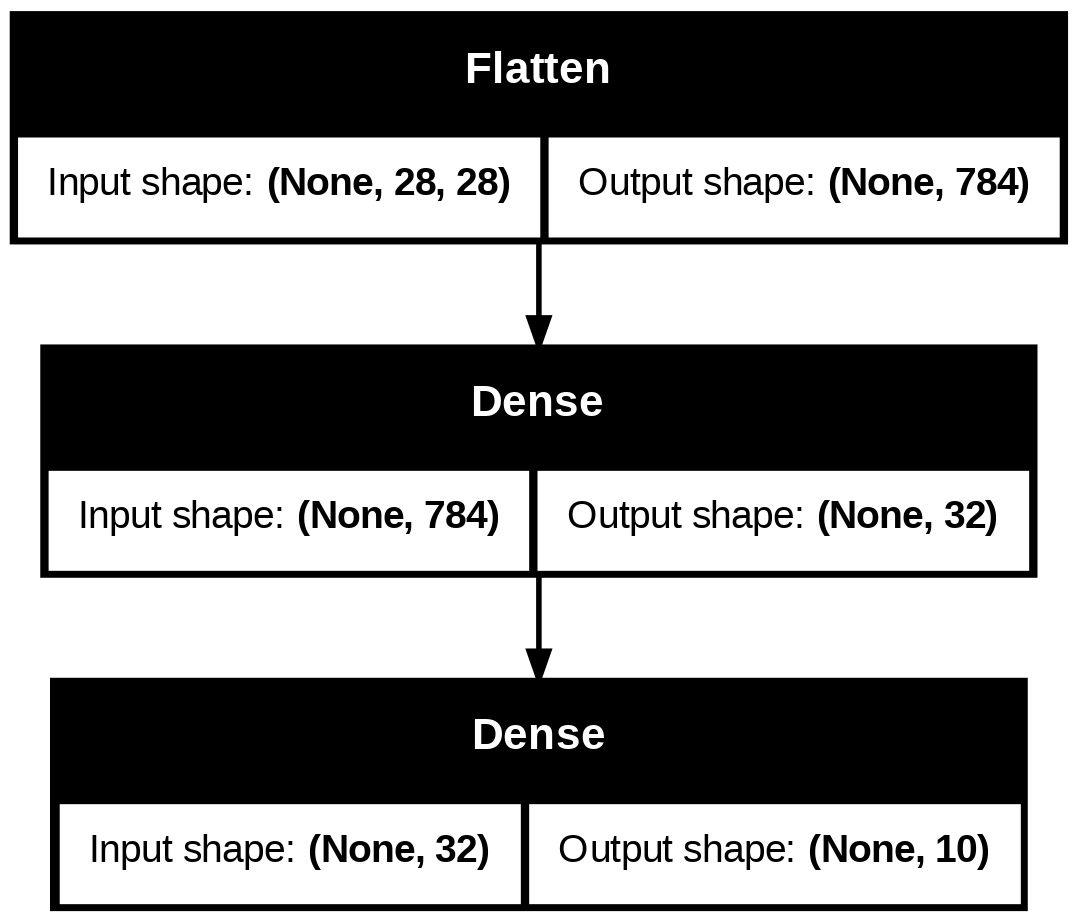

In [14]:
keras.utils.plot_model(model, show_shapes=True)

# 🚀 Now we can fit the model to the input data
* The `fit()` method fit the model to the data, the parameters are *data* and *labels* from the train set and number of *epoch* to be trained.
* The `validation_split` parameter is also very common. What does the parameter do?
    * What is the validation set? How is it different from the test set?

## FAQ section 🙂
* How does the ANN training procedure look like?
* What is the *epoch*?
  - one cycle of model training that iterate through whole dataset
* What is the *batch*?
  - how big of chunk will be sent for model to learn during one epoch
  - helps with parallelisation and speed of model learning
    - too low or low might give lower accuracy
    - rule of thumb is use power of two due to the instruction of CPU   
* Why do we use batches?
    * Is possible to have batch of size `len(data)` or of size `1`?
      - **Batch = `len(data)`**: Requires too much memory, slows training.
      - **Batch = `1`**: Training is slow, optimization less stable.
    * What are caveates of these cases?
      - **Too large batch**: Memory issues, slow updates.
      - **Too small batch**: Noisy updates, slower convergence.

# Define the callbacks
* 💡  Always use `ModelCheckpoint` callback so you overcome the possible overfitting in the last few epochs!

## The `.fit()` API is pretty powerful
* It is common to use some sort of a callback, we will use `ModelCheckpoint` callback which saves the best weights configuration obtained during training so the overfitting at the final phase of training will be suppressed

* **💡 The best weights are determined using the validation loss value**

In [15]:
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='best.weights.h5',
    save_weights_only=True,
    monitor='val_loss',
    mode='auto',
    save_best_only=True)

# Fit the model

In [16]:
history = model.fit(x_train, y_train, validation_split=0.2, epochs=3, callbacks=[model_checkpoint_callback], batch_size=128)

Epoch 1/3
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7130 - loss: 0.9746 - val_accuracy: 0.9191 - val_loss: 0.2899
Epoch 2/3
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9204 - loss: 0.2873 - val_accuracy: 0.9310 - val_loss: 0.2442
Epoch 3/3
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9320 - loss: 0.2400 - val_accuracy: 0.9411 - val_loss: 0.2132


# 📈 Plot Analysis: Accuracy and Loss
The plot displays both training and validation trends, with accuracy increasing and loss decreasing over epochs.

- **Lower Loss & Higher Accuracy:**  
  It's normal for the loss to decrease and accuracy to increase during training, which indicates that the model is learning. Occasional fluctuations—where the loss may spike briefly—are also common due to the stochastic nature of optimization.

- **Loss Function Behavior:**  
  The loss can sometimes increase in short intervals because of noise in the training process, but overall a downward trend is desired.

- **Overfitting Indicator:**  
  If the training loss continues to decrease while the validation loss starts increasing, this situation is known as **overfitting**. Overfitting occurs when the model learns the training data too well and fails to generalize to unseen data.

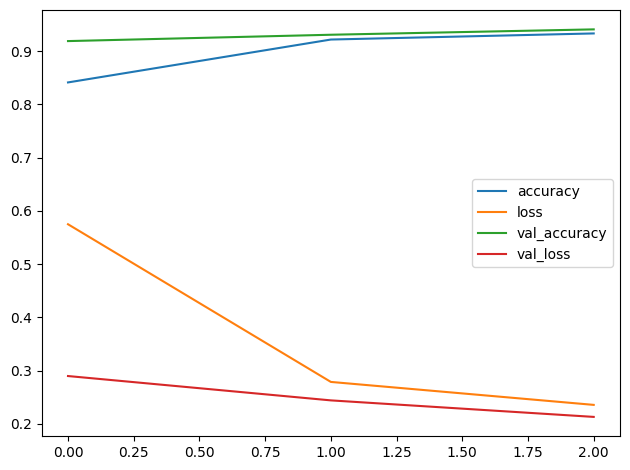

In [17]:
plt.figure()
for key in history.history.keys():
    plt.plot(history.epoch, history.history[key], label=key)
plt.legend()
plt.tight_layout()

# 📌 Beware that ANNs are prone to overfitting!

### How does overfit look like?
* Y axis = Accuracy
* X axis = Epoch

![overfit](https://github.com/rasvob/VSB-FEI-Deep-Learning-Exercises/blob/main/images/overfit_acc.png?raw=true "Overfit")

# 🔎 How can we solve the overfitting issue?

## 1 - Use simpler model
* The model often overfit because there is a lot of parameters for the amount of input data

## 2 - Use Dropout layer
* Node sampling instead of edge sampling
* If a node is dropped, then all incoming and outgoing connections from that node need to be dropped as well
* We sample sub-networks from the original one - basically ensemble of networks
* There won't be some "alpha" node in the individual layer with huge weight coefficient
    * Responsibility for prediction will be shared among multiple nodes

![dropout](https://github.com/rasvob/2020-21-ARD/raw/master/images/dropout.jpeg "Dropout")

## 💡 Keras API
- `keras.layers.Dropout(0.5)`
- Take a look [here](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout)

## Beware that the best weights needs to be loaded after the training is finished!
* **💡 Otherwise you use the weights from the last epoch!**

In [18]:
model.load_weights("best.weights.h5")

## Now we can use *evaluate()* function for obtaining the accuracy using the test set

![meme02](https://github.com/rasvob/VSB-FEI-Deep-Learning-Exercises/blob/main/images/dl_meme_02.jpg?raw=true "AI Meme 02")

In [19]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy: ', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9301 - loss: 0.2489
Test accuracy:  0.9398999810218811


# Can we obtain the labels and use it for our own evaluation without Keras? Sure!

## We will obtain the raw softmax outputs
* 🔎 What is the range of the vector values?
* 🔎 Do they sum-up to some number?

In [20]:
y_pred_proba = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [21]:
y_pred_proba[0]

array([8.2568018e-05, 9.1891490e-09, 2.9557677e-05, 2.7477946e-03,
       7.5714348e-07, 1.1951206e-04, 5.2841685e-08, 9.9665326e-01,
       1.1374089e-05, 3.5517820e-04], dtype=float32)

In [22]:
np.sum(y_pred_proba[0])

1.0000001

## Now we can extract the index of the highest probability and get the labels

In [23]:
y_pred = np.argmax(y_pred_proba, axis=1)

In [24]:
y_pred

array([7, 2, 1, ..., 4, 5, 6])

# Is the model any better than the ML baseline?

In [25]:
accuracy_score(y_true=y_test, y_pred=y_pred)

0.9399

# We can now re-build the same network using a Functional API
* You can use any API that you like however I recommend the **Functional** one as it is more versatile in advanced use-cases, e.g. building ANN architecture with skip-connect synaptic links

In [26]:
ann_input = keras.layers.Input(shape=(28, 28))
flatten = keras.layers.Flatten()(ann_input)
hidden = keras.layers.Dense(32, activation='relu')(flatten)
ann_output = keras.layers.Dense(10, activation='softmax')(hidden)

model = keras.Model(ann_input, ann_output)

model.compile(optimizer='adam',
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics = ['accuracy'],
    )

model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 28, 28)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │          25,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,450 (99.41 KB)

 Trainable params: 25,450 (99.41 KB)

 Non-trainable params: 0 (0.00 B)

## ⚡ The rest of the training process is the same

In [27]:
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='best.weights.h5',
    save_weights_only=True,
    monitor='val_loss',
    mode='auto',
    save_best_only=True)

history = model.fit(x_train, y_train, validation_split=0.2, epochs=3, callbacks=[model_checkpoint_callback], batch_size=128)
model.load_weights("best.weights.h5")

test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy: ', test_acc)

Epoch 1/3
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7429 - loss: 0.9204 - val_accuracy: 0.9173 - val_loss: 0.2912
Epoch 2/3
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9205 - loss: 0.2790 - val_accuracy: 0.9358 - val_loss: 0.2301
Epoch 3/3
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9362 - loss: 0.2249 - val_accuracy: 0.9408 - val_loss: 0.2116
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9295 - loss: 0.2422
Test accuracy:  0.9390000104904175


# Inference and Deployment

- **Save the Model:**  
  📌 Once training is complete, save your model to a file. This avoids retraining every time you need to make predictions.

- **Load the Model for Inference:**  
  📂 In your web app, load the saved model and use it to process incoming data and generate predictions.

## Save the model
* We are using the new `.keras` format

In [28]:
model.save('mnist_model.keras')

## Load the model back to memory and test it

In [29]:
loaded_model = keras.models.load_model('mnist_model.keras')
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy: ', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9295 - loss: 0.2422
Test accuracy:  0.9390000104904175


# ✅ Task (2p)

(Make sure you define new model, compile it and fit it, otherwise it will use one model on different batch sizes)

1) Experiment with batch_sizes, use these two settings and compare the results (📌 Compare training time and accuracy) - **(0.5p)**

    1) Use batch_size=1

    2) Use batch_size=1024
    
2) Add `Dropout` layer just before the `SoftMax` output layer in you architecture use these two settings and compare the results (📌 Take a look at the train and val accuracy) - **(0.5p)**

    1) Dropout(0.2)
    
    2) Dropout(0.95)
    
3) Define your own architecture using either one of the showed API and try to beat the basic model - **(1p)**

## Task 1

### Helper functions

#### Wrapper time tracking

In [30]:
class TimeTracker:
  def __enter__(self):
    self.start_time = time.time()
    return self

  def __exit__(self, exc_type, exc_value, traceback):
    self.end_time = time.time()
    self.execution_time = self.end_time - self.start_time
    minutes = self.execution_time // 60
    seconds = self.execution_time % 60
    print(f"Execution time: {minutes:.0f} minutes and {seconds:.2f} seconds")

#### Create and compile model

In [31]:
def create_model():
    model = keras.Sequential([
      keras.layers.Flatten(input_shape=(28, 28)),
      keras.layers.Dense(32, activation=tf.nn.relu),
      keras.layers.Dense(10, activation=tf.nn.softmax),
    ])

    model.compile(optimizer='adam',
        loss = keras.losses.SparseCategoricalCrossentropy(from_logits=False),
        metrics = ['accuracy'],
    )

    return model

### Training

#### Training with batch size 1

In [32]:
model_1 = create_model()
with TimeTracker():
    history_1 = model_1.fit(x_train, y_train, validation_split=0.2, epochs=3, batch_size=1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/3
48000/48000 ━━━━━━━━━━━━━━━━━━━━ 143s 3ms/step - accuracy: 0.8819 - loss: 0.3999 - val_accuracy: 0.9439 - val_loss: 0.2020
Epoch 2/3
48000/48000 ━━━━━━━━━━━━━━━━━━━━ 156s 3ms/step - accuracy: 0.9523 - loss: 0.1610 - val_accuracy: 0.9544 - val_loss: 0.1631
Epoch 3/3
48000/48000 ━━━━━━━━━━━━━━━━━━━━ 191s 3ms/step - accuracy: 0.9631 - loss: 0.1283 - val_accuracy: 0.9602 - val_loss: 0.1598
Execution time: 8 minutes and 10.00 seconds


#### Training with batch size 1024

In [33]:
model_1024 = create_model()
with TimeTracker():
    history_1024 = model_1024.fit(x_train, y_train, validation_split=0.2, epochs=3, batch_size=1024)

Epoch 1/3
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.4403 - loss: 1.7830 - val_accuracy: 0.8577 - val_loss: 0.6581
Epoch 2/3
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8550 - loss: 0.5993 - val_accuracy: 0.8951 - val_loss: 0.4060
Epoch 3/3
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8885 - loss: 0.4159 - val_accuracy: 0.9108 - val_loss: 0.3379
Execution time: 0 minutes and 4.23 seconds


### Result

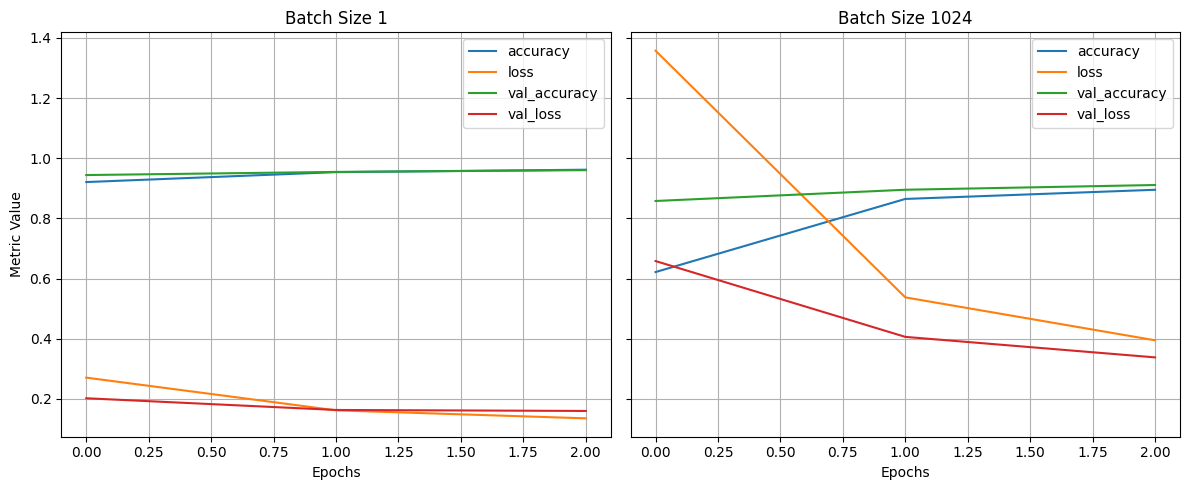

In [34]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

for key in history_1.history.keys():
  axes[0].plot(history_1.epoch, history_1.history[key], label=key)
axes[0].set_title("Batch Size 1")
axes[0].set_xlabel("Epochs")
axes[0].set_ylabel("Metric Value")
axes[0].legend()
axes[0].grid(True)

for key in history_1024.history.keys():
  axes[1].plot(history_1024.epoch, history_1024.history[key], label=key)
axes[1].set_title("Batch Size 1024")
axes[1].set_xlabel("Epochs")
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

- **Batch Size <ins>1</ins>**: Slower convergence ⏳, with gradual accuracy improvement and loss reduction.
- **Batch Size <ins>1024</ins>**: Rapid loss decline 📉 and faster accuracy gains 📈, indicating more efficient learning.
- *Execution Time*:
  - Batch Size 1 → ⏱️ 8 min 10 sec (extremely slow).
  - Batch Size 1024 → ⚡ 4.23 sec (vastly faster).

## Task 2

### Create and compile model with defined dropout

In [35]:
def create_model_with_dropout(dropout_rate):
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(32, activation=tf.nn.relu),
        keras.layers.Dropout(dropout_rate),
        keras.layers.Dense(10, activation=tf.nn.softmax),
    ])

    model.compile(optimizer='adam',
      loss=keras.losses.SparseCategoricalCrossentropy(from_logits=False),
      metrics=['accuracy'])

    return model

### Training

#### Training with Dropout(0.2)

In [36]:
model_dropout_02 = create_model_with_dropout(0.2)
history_dropout_02 = model_dropout_02.fit(x_train, y_train, validation_split=0.2, epochs=3, batch_size=128)

Epoch 1/3
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6650 - loss: 1.0876 - val_accuracy: 0.9197 - val_loss: 0.2927
Epoch 2/3
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8886 - loss: 0.3831 - val_accuracy: 0.9312 - val_loss: 0.2370
Epoch 3/3
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9101 - loss: 0.3147 - val_accuracy: 0.9392 - val_loss: 0.2094


#### Training with Dropout(0.95)

In [37]:
model_dropout_95 = create_model_with_dropout(0.95)
history_dropout_95 = model_dropout_95.fit(x_train, y_train, validation_split=0.2, epochs=3, batch_size=128)

Epoch 1/3
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.1311 - loss: 2.3572 - val_accuracy: 0.6641 - val_loss: 1.8247
Epoch 2/3
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1726 - loss: 2.1351 - val_accuracy: 0.7657 - val_loss: 1.5932
Epoch 3/3
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1953 - loss: 2.0713 - val_accuracy: 0.7867 - val_loss: 1.4757


### Result

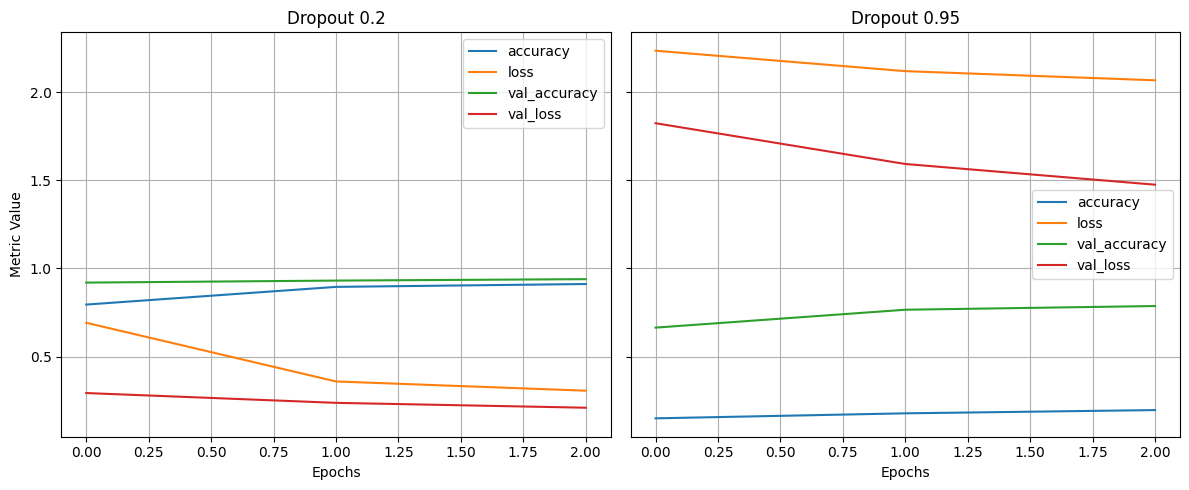

In [38]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)  # Share y-axis

for key in history_dropout_02.history.keys():
  axes[0].plot(history_dropout_02.epoch, history_dropout_02.history[key], label=key)
axes[0].set_title("Dropout 0.2")
axes[0].set_xlabel("Epochs")
axes[0].set_ylabel("Metric Value")
axes[0].legend()
axes[0].grid(True)

for key in history_dropout_95.history.keys():
  axes[1].plot(history_dropout_95.epoch, history_dropout_95.history[key], label=key)
axes[1].set_title("Dropout 0.95")
axes[1].set_xlabel("Epochs")
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

- **Dropout </ns>0.2</ins>**: Balanced regularization ✅, steady accuracy increase 📈, and loss reduction 📉.
- **Dropout <ins>0.95</ins>**: Extremely high dropout 🚨, very slow accuracy growth 🐢, and higher loss values 🚀.

Conclusion:

A dropout of 0.2 helps prevent overfitting while maintaining strong learning. A 0.95 dropout removes too many neurons, leading to poor learning and high loss. Finding the right balance is key! ⚖️🔥


## Task  3

### New model

In [39]:
improved_model = keras.Sequential([
  keras.layers.Flatten(input_shape=(28, 28)),
  keras.layers.Dense(128, activation='relu'),  # more neurons
  keras.layers.Dropout(0.2),  # for overfitting prevention
  keras.layers.Dense(64, activation='relu'),  # Extra hidden layer
  keras.layers.Dense(10, activation='softmax')  # Output layer
])

**More Neurons**: Increased complexity with 128 neurons in the first layer (compared to 32 before)🧠.

**Dropout**: Included a Dropout(0.2) layer to prevent overfitting from previous task 🚫📈.

**Extra Layer**: Added another layer with 64 neurons for potentially better learning 🧠➕.

### Training

In [40]:
improved_model.compile(
  optimizer='adam',
  loss = keras.losses.SparseCategoricalCrossentropy(from_logits=False),
  metrics = ['accuracy'],
)

In [41]:
history_improved = improved_model.fit(x_train, y_train, validation_split=0.2, epochs=3, callbacks=[model_checkpoint_callback], batch_size=128)

improved_test_loss, improved_test_acc = improved_model.evaluate(x_test, y_test)
print('Improved Model Test accuracy:', improved_test_acc)

Epoch 1/3
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7828 - loss: 0.7314 - val_accuracy: 0.9488 - val_loss: 0.1755
Epoch 2/3
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9405 - loss: 0.2008 - val_accuracy: 0.9614 - val_loss: 0.1334
Epoch 3/3
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9573 - loss: 0.1413 - val_accuracy: 0.9636 - val_loss: 0.1192
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9580 - loss: 0.1350
Improved Model Test accuracy: 0.9631999731063843


## Result

In [42]:
print('Original model test accuracy:', test_acc)
print('Improved model test accuracy:', improved_test_acc)

Original model test accuracy: 0.9390000104904175
Improved model test accuracy: 0.9631999731063843


- **Improved Accuracy**: The test accuracy increased from `0.939` in the original model to `0.963` in the new model! ✅

- Result: More complex model with dropout layer led to better performance without some overfitting. 🔥